<a href="https://colab.research.google.com/github/RashmitVartak/DAV/blob/main/MiniProject_DAV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv("/content/breast_cancer_data.csv")
df.head()


id diagnosis  radius_mean  texture_mean  perimeter_mean  \
0  8.423020e+05         M    17.998968     10.565640      122.852200   
1  8.425170e+05         M    20.511013     17.787839      132.954490   
2  8.430090e+07         M    19.763749     21.134635      129.917650   
3  8.434830e+07         M    11.449166     20.516768       77.383695   
4  8.435840e+07         M    20.354812     14.199572      135.217358   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0  1001.106710         0.081984          0.285834        0.398145   
1  1325.823346         0.245554          0.194282        0.138061   
2  1202.924928         0.216573          0.259434        0.131534   
3   385.991075         0.198868          0.213599        0.087538   
4  1296.950523         0.115178          0.119498        0.027547   

   concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
0             0.148971       0.353091                0.017206   0.973743   
1             0.181164       0.263240               -0.077472   0.603223   
2             0.167189       0.242958                0.173663   0.861760   
3             0.080289       0.334566                0.157591   0.222218   
4             0.023348       0.229555                0.070076   0.934170   

   texture_se  perimeter_se     area_se  smoothness_se  compactness_se  \
0    0.765052      8.560768  153.418144      -0.186312        0.217184   
1    0.656813      3.479828   73.881462       0.101236       -0.095907   
2    0.757405      4.515927   94.174936       0.174298        0.114017   
3    1.241904      3.513392   27.107167      -0.114500        0.247295   
4    0.611162      5.334372   94.382490      -0.116488        0.146142   

   concavity_se  concave points_se  symmetry_se  fractal_dimension_se  \
0      0.160208          -0.079299    -0.023415              0.005301   
1      0.143084           0.153995     0.024608              0.000619   
2     -0.002335          -0.112769    -0.119702              0.113259   
3     -0.047021           0.145091    -0.031787              0.164126   
4      0.225344           0.024724     0.075117             -0.065606   

   radius_worst  texture_worst  perimeter_worst   area_worst  \
0     25.440416      17.224112       184.661651  2019.152914   
1     24.826036      23.518646       158.844671  1955.890927   
2     23.533687      25.667160       152.490715  1708.938861   
3     14.824450      26.557872        99.092503   567.891598   
4     22.513137      16.567093       152.203620  1574.985822   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0          0.246364           0.698641         0.738654              0.066592   
1          0.004187           0.143044         0.123242              0.460569   
2          0.203708           0.317832         0.483000              0.323903   
3          0.192048           0.808203         0.667493              0.332574   
4          0.150841           0.184497         0.293628              0.290815   

   symmetry_worst  fractal_dimension_worst  
0        0.457838                 0.142958  
1        0.314415                 0.178515  
2        0.394406                 0.042000  
3        0.567382                 0.175874  
4        0.146084                 0.009563

In [ ]:
#Changing the data from Categorical to Binary
df["diagnosis"].replace({"M": 1, "B": 0}, inplace=True)
df.drop("id", axis=1, inplace=True)
df_ordered = df[['diagnosis', 'radius_mean', 'radius_se', 'radius_worst',
         'texture_mean', 'texture_se', 'texture_worst',
         'perimeter_mean', 'perimeter_se', 'perimeter_worst',
         'area_mean', 'area_se', 'area_worst',
         'smoothness_mean', 'smoothness_se', 'smoothness_worst',
         'compactness_mean', 'compactness_se', 'compactness_worst',
         'concavity_mean', 'concavity_se', 'concavity_worst',
         'concave points_mean', 'concave points_se', 'concave points_worst',
         'symmetry_mean', 'symmetry_se', 'symmetry_worst',
         'fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst']]
df_ordered.head()

diagnosis  radius_mean  radius_se  radius_worst  texture_mean  texture_se  \
0          1    17.998968   0.973743     25.440416     10.565640    0.765052   
1          1    20.511013   0.603223     24.826036     17.787839    0.656813   
2          1    19.763749   0.861760     23.533687     21.134635    0.757405   
3          1    11.449166   0.222218     14.824450     20.516768    1.241904   
4          1    20.354812   0.934170     22.513137     14.199572    0.611162   

   texture_worst  perimeter_mean  perimeter_se  perimeter_worst    area_mean  \
0      17.224112      122.852200      8.560768       184.661651  1001.106710   
1      23.518646      132.954490      3.479828       158.844671  1325.823346   
2      25.667160      129.917650      4.515927       152.490715  1202.924928   
3      26.557872       77.383695      3.513392        99.092503   385.991075   
4      16.567093      135.217358      5.334372       152.203620  1296.950523   

      area_se   area_worst  smoothness_mean  smoothness_se  smoothness_worst  \
0  153.418144  2019.152914         0.081984      -0.186312          0.246364   
1   73.881462  1955.890927         0.245554       0.101236          0.004187   
2   94.174936  1708.938861         0.216573       0.174298          0.203708   
3   27.107167   567.891598         0.198868      -0.114500          0.192048   
4   94.382490  1574.985822         0.115178      -0.116488          0.150841   

   compactness_mean  compactness_se  compactness_worst  concavity_mean  \
0          0.285834        0.217184           0.698641        0.398145   
1          0.194282       -0.095907           0.143044        0.138061   
2          0.259434        0.114017           0.317832        0.131534   
3          0.213599        0.247295           0.808203        0.087538   
4          0.119498        0.146142           0.184497        0.027547   

   concavity_se  concavity_worst  concave points_mean  concave points_se  \
0      0.160208         0.738654             0.148971          -0.079299   
1      0.143084         0.123242             0.181164           0.153995   
2     -0.002335         0.483000             0.167189          -0.112769   
3     -0.047021         0.667493             0.080289           0.145091   
4      0.225344         0.293628             0.023348           0.024724   

   concave points_worst  symmetry_mean  symmetry_se  symmetry_worst  \
0              0.066592       0.353091    -0.023415        0.457838   
1              0.460569       0.263240     0.024608        0.314415   
2              0.323903       0.242958    -0.119702        0.394406   
3              0.332574       0.334566    -0.031787        0.567382   
4              0.290815       0.229555     0.075117        0.146084   

   fractal_dimension_mean  fractal_dimension_se  fractal_dimension_worst  
0                0.017206              0.005301                 0.142958  
1               -0.077472              0.000619                 0.178515  
2                0.173663              0.113259                 0.042000  
3                0.157591              0.164126                 0.175874  
4                0.070076             -0.065606                 0.009563

In [ ]:
df.describe()



diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5000.000000  5000.000000   5000.000000     5000.000000  5000.000000   
mean      0.376000    14.136307     19.261162       92.028693   655.580275   
std       0.484428     3.519792      4.281229       24.265380   351.248270   
min       0.000000     6.788208      9.595159       43.672436   143.352701   
25%       0.000000    11.702172     16.157728       75.102944   420.263711   
50%       0.000000    13.370060     18.824046       86.304679   551.642966   
75%       1.000000    15.884355     21.760838      104.341509   788.467909   
max       1.000000    28.290578     39.523316      188.690674  2501.267696   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count      5000.000000       5000.000000     5000.000000          5000.000000   
mean          0.095852          0.102893        0.088346             0.050657   
std           0.099077          0.112620        0.129240             0.106614   
min          -0.264052         -0.326382       -0.318571            -0.339098   
25%           0.029605          0.025387       -0.001326            -0.023709   
50%           0.094938          0.100788        0.080267             0.048422   
75%           0.163099          0.178070        0.166449             0.123319   
max           0.518377          0.543841        0.608076             0.439630   

       symmetry_mean  fractal_dimension_mean    radius_se   texture_se  \
count    5000.000000             5000.000000  5000.000000  5000.000000   
mean        0.180089                0.063686     0.405288     1.216831   
std         0.104576                0.101157     0.291935     0.559907   
min        -0.212350               -0.314672    -0.127587     0.122288   
25%         0.109565               -0.007429     0.222130     0.833360   
50%         0.182533                0.066033     0.338674     1.120135   
75%         0.250982                0.131762     0.508652     1.475721   
max         0.529224                0.411879     3.006605     5.128031   

       perimeter_se      area_se  smoothness_se  compactness_se  concavity_se  \
count   5000.000000  5000.000000    5000.000000     5000.000000   5000.000000   
mean       2.867494    40.403172       0.007799        0.028614      0.033445   
std        2.017588    45.180428       0.099718        0.102087      0.106072   
min        0.584548     6.632779      -0.369697       -0.328564     -0.351072   
25%        1.624047    17.862507      -0.060620       -0.040380     -0.037251   
50%        2.288741    24.585431       0.007673        0.027524      0.033391   
75%        3.373288    45.345688       0.075153        0.096976      0.101686   
max       22.082978   542.342863       0.403763        0.406258      0.624119   

       concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
count        5000.000000  5000.000000           5000.000000   5000.000000   
mean            0.010889     0.019046              0.003776     16.283429   
std             0.100477     0.099517              0.099832      4.832824   
min            -0.382377    -0.346203             -0.358267      7.824986   
25%            -0.056661    -0.049032             -0.063271     12.998994   
50%             0.011467     0.019748              0.003936     14.966271   
75%             0.077858     0.087829              0.071897     18.887970   
max             0.351618     0.324978              0.353521     36.202485   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count    5000.000000      5000.000000  5000.000000       5000.000000   
mean       25.649434       107.362482   882.139326          0.132123   
std         6.134428        33.572535   568.608279          0.101763   
min        11.880520        50.303316   185.054864         -0.237304   
25%        21.080184        84.132952   515.329216          0.065586   
50%        25.363651        97.736537   686.507272   

##Preprocessing


In [ ]:
df.isnull()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         False        False         False           False      False   
1         False        False         False           False      False   
2         False        False         False           False      False   
3         False        False         False           False      False   
4         False        False         False           False      False   
...         ...          ...           ...             ...        ...   
4995      False        False         False           False      False   
4996      False        False         False           False      False   
4997      False        False         False           False      False   
4998      False        False         False           False      False   
4999      False        False         False           False      False   

      smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0               False             False           False                False   
1               False             False           False                False   
2               False             False           False                False   
3               False             False           False                False   
4               False             False           False                False   
...               ...               ...             ...                  ...   
4995            False             False           False                False   
4996            False             False           False                False   
4997            False             False           False                False   
4998            False             False           False                False   
4999            False             False           False                False   

      symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0             False                   False      False       False   
1             False                   False      False       False   
2             False                   False      False       False   
3             False                   False      False       False   
4             False                   False      False       False   
...             ...                     ...        ...         ...   
4995          False                   False      False       False   
4996          False                   False      False       False   
4997          False                   False      False       False   
4998          False                   False      False       False   
4999          False                   False      False       False   

      perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
0            False    False          False           False         False   
1            False    False          False           False         False   
2            False    False          False           False         False   
3            False    False          False           False         False   
4            False    False          False           False         False   
...            ...      ...            ...             ...           ...   
4995         False    False          False           False         False   
4996         False    False          False           False         False   
4997         False    False          False           False         False   
4998         False    False          False           False         False   
4999         False    False          False           False         False   

      concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
0                 False        False                 False         False   
1                 False        False                 False         False   
2                 False        False                 False         False   
3                 False        False                 False         False   
4                 False        Fal

In [ ]:
df

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
0             1    17.998968     10.565640      122.852200  1001.106710   
1             1    20.511013     17.787839      132.954490  1325.823346   
2             1    19.763749     21.134635      129.917650  1202.924928   
3             1    11.449166     20.516768       77.383695   385.991075   
4             1    20.354812     14.199572      135.217358  1296.950523   
...         ...          ...           ...             ...          ...   
4995          0    10.349859     18.329683       66.696672   340.913089   
4996          1    17.919459     16.772118      117.269841   990.102325   
4997          0    11.763408     24.725117       77.635732   441.287241   
4998          1    17.753508     28.180264      117.175889   981.576127   
4999          0    14.708886     17.560058       95.846387   674.676573   

      smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.081984          0.285834        0.398145             0.148971   
1            0.245554          0.194282        0.138061             0.181164   
2            0.216573          0.259434        0.131534             0.167189   
3            0.198868          0.213599        0.087538             0.080289   
4            0.115178          0.119498        0.027547             0.023348   
...               ...               ...             ...                  ...   
4995         0.106189          0.008129       -0.050550            -0.013094   
4996         0.062895         -0.030011        0.217073             0.023926   
4997        -0.077594          0.228967        0.097245             0.021119   
4998         0.051318          0.043784        0.033400             0.017686   
4999        -0.149281          0.089516        0.054417             0.040425   

      symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0          0.353091                0.017206   0.973743    0.765052   
1          0.263240               -0.077472   0.603223    0.656813   
2          0.242958                0.173663   0.861760    0.757405   
3          0.334566                0.157591   0.222218    1.241904   
4          0.229555                0.070076   0.934170    0.611162   
...             ...                     ...        ...         ...   
4995       0.141998                0.118298   0.200832    2.600902   
4996       0.102955                0.088434   0.137906    0.812812   
4997       0.217262                0.173088   0.302958    1.113252   
4998       0.175122                0.088245   0.372184    1.032835   
4999       0.137960                0.100303   0.160752    0.709474   

      perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  \
0         8.560768  153.418144      -0.186312        0.217184      0.160208   
1         3.479828   73.881462       0.101236       -0.095907      0.143084   
2         4.515927   94.174936       0.174298        0.114017     -0.002335   
3         3.513392   27.107167      -0.114500        0.247295     -0.047021   
4         5.334372   94.382490      -0.116488        0.146142      0.225344   
...            ...         ...            ...             ...           ...   
4995      1.178711   13.137245      -0.090648       -0.024097      0.037563   
4996      1.831258   35.821865       0.029305       -0.112669      0.220136   
4997      1.743645   19.488911       0.001368        0.274512      0.057994   
4998      3.021769   43.985368      -0.156189        0.113098      0.027275   
4999      1.474146   19.719829      -0.032095        0.094653     -0.056272   

      concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
0             -0.079299    -0.023415              0.005301     25.440416   
1              0.153995     0.024608              0.000619     24.826036   
2             -0.112769    -0.119702              0.113259     23.533687   
3              0.145091    -0.031787              

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum()


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

##EDA

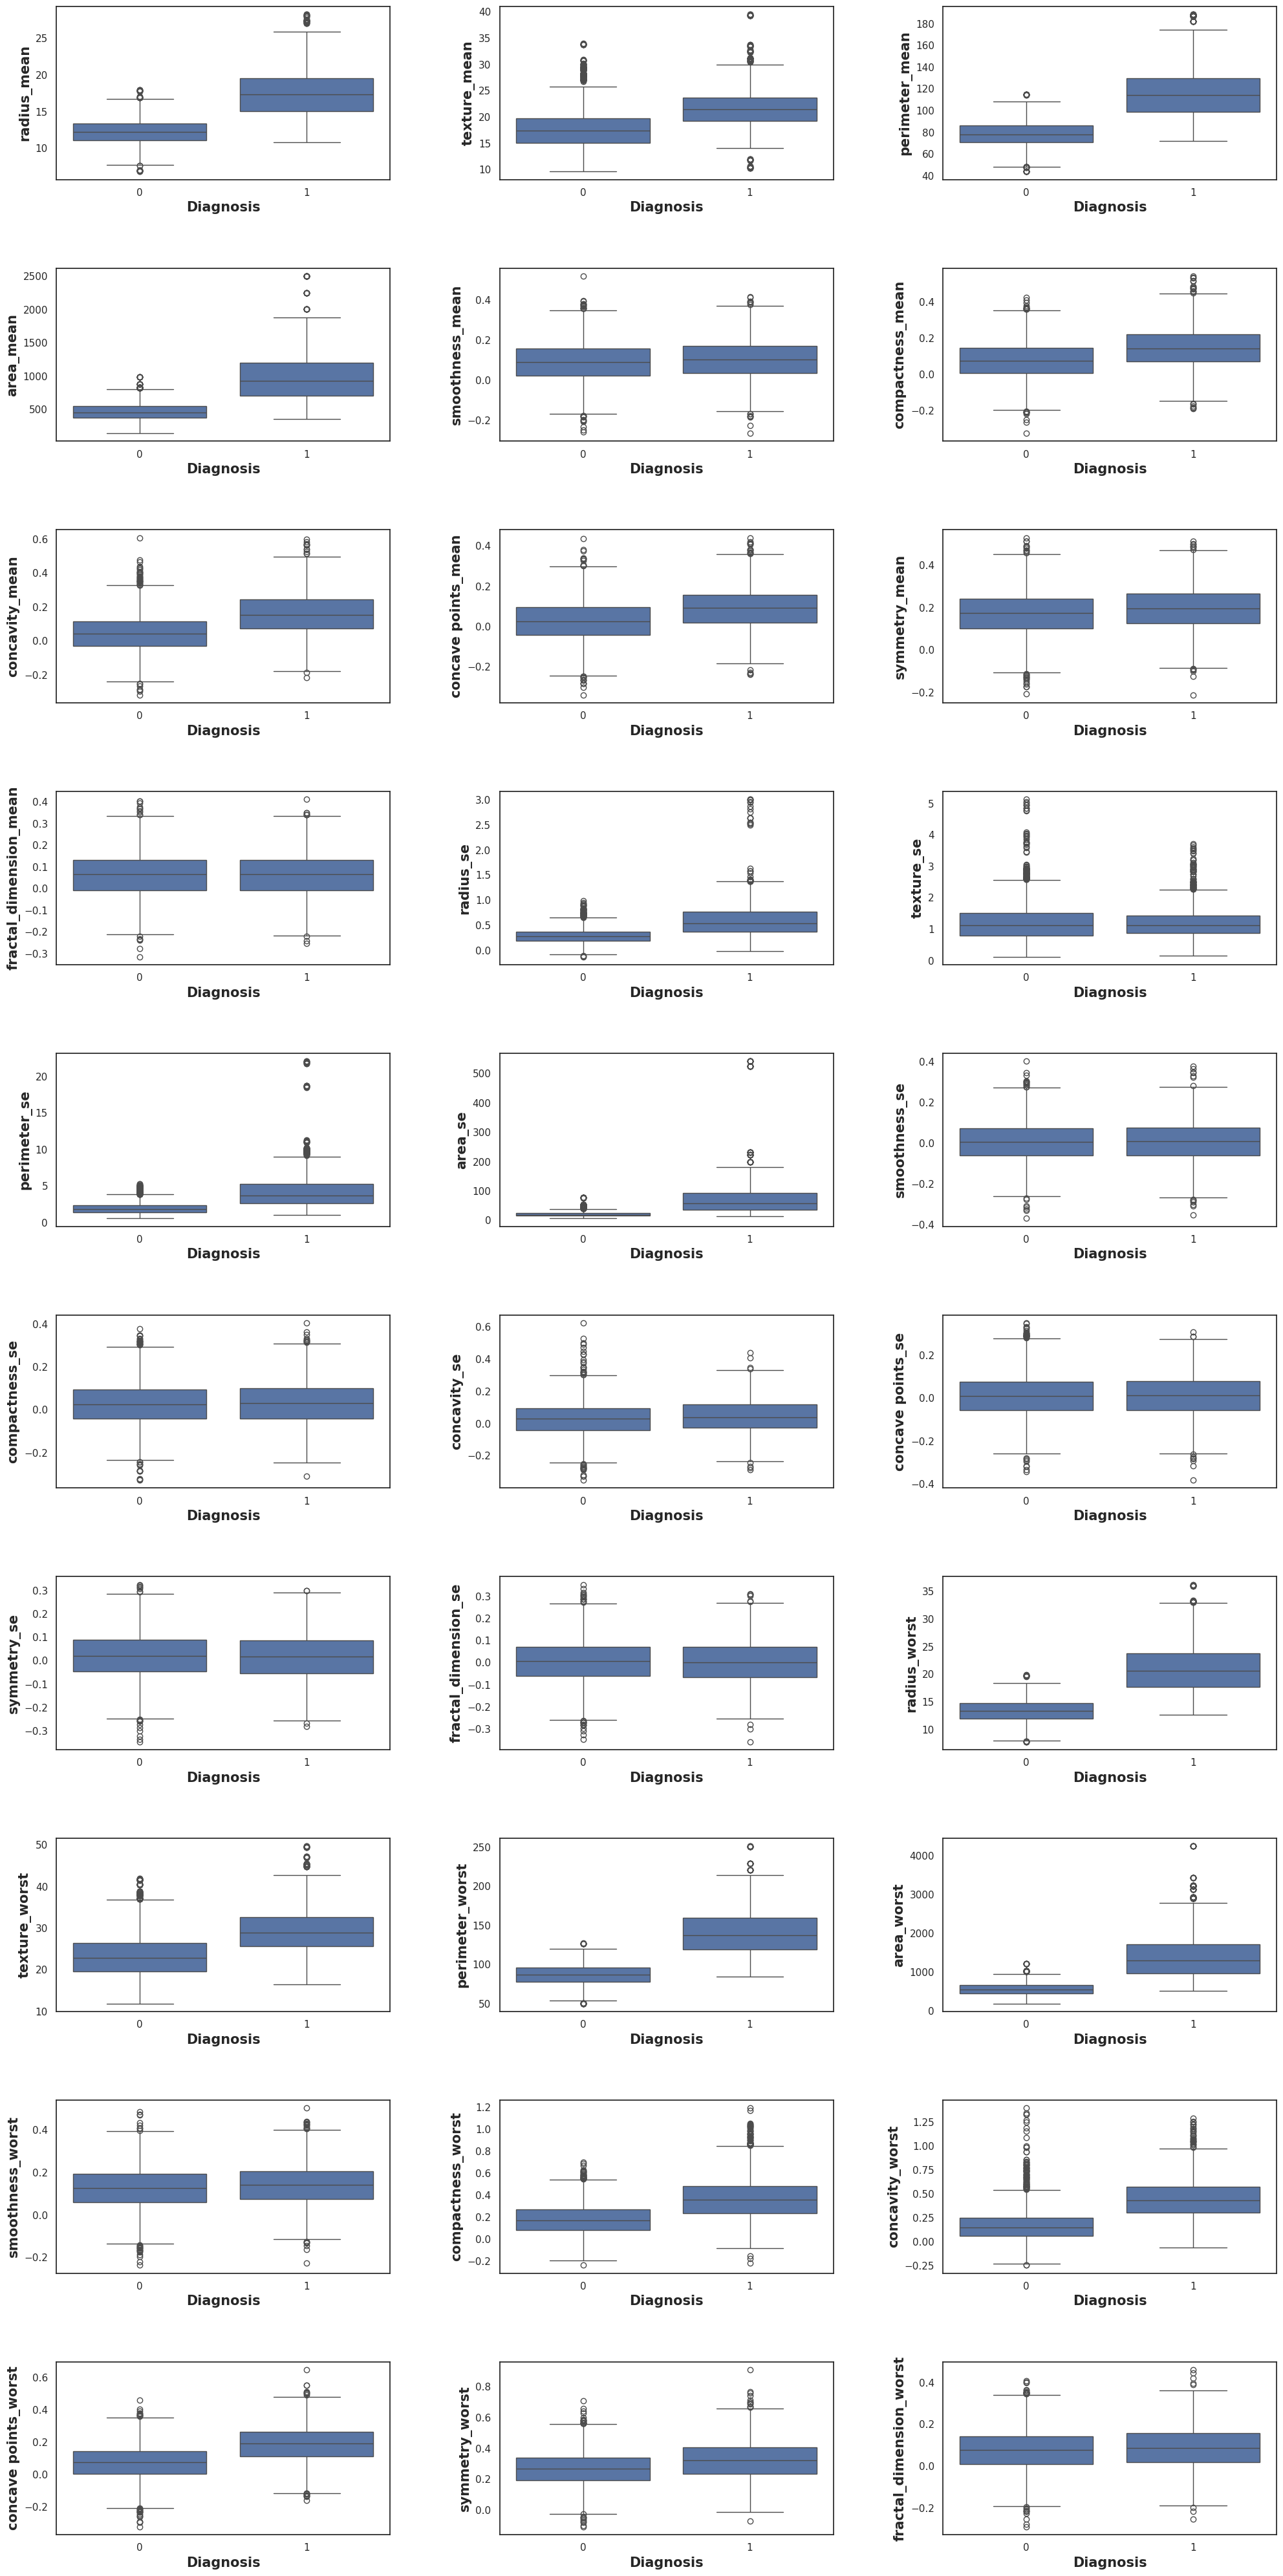

In [ ]:
fig, ax = plt.subplots(10, 3, figsize=(20, 40))
ax = ax.flatten()

for i, col in enumerate(df.columns[1:]):
    sns.boxplot(x='diagnosis', y=col, data=df, ax=ax[i])
    ax[i].set_xlabel('Diagnosis', fontsize = 15, fontweight = 'bold')
    ax[i].set_ylabel(col, fontsize = 15, fontweight = 'bold')

plt.tight_layout(w_pad=5, h_pad=5)
plt.show()

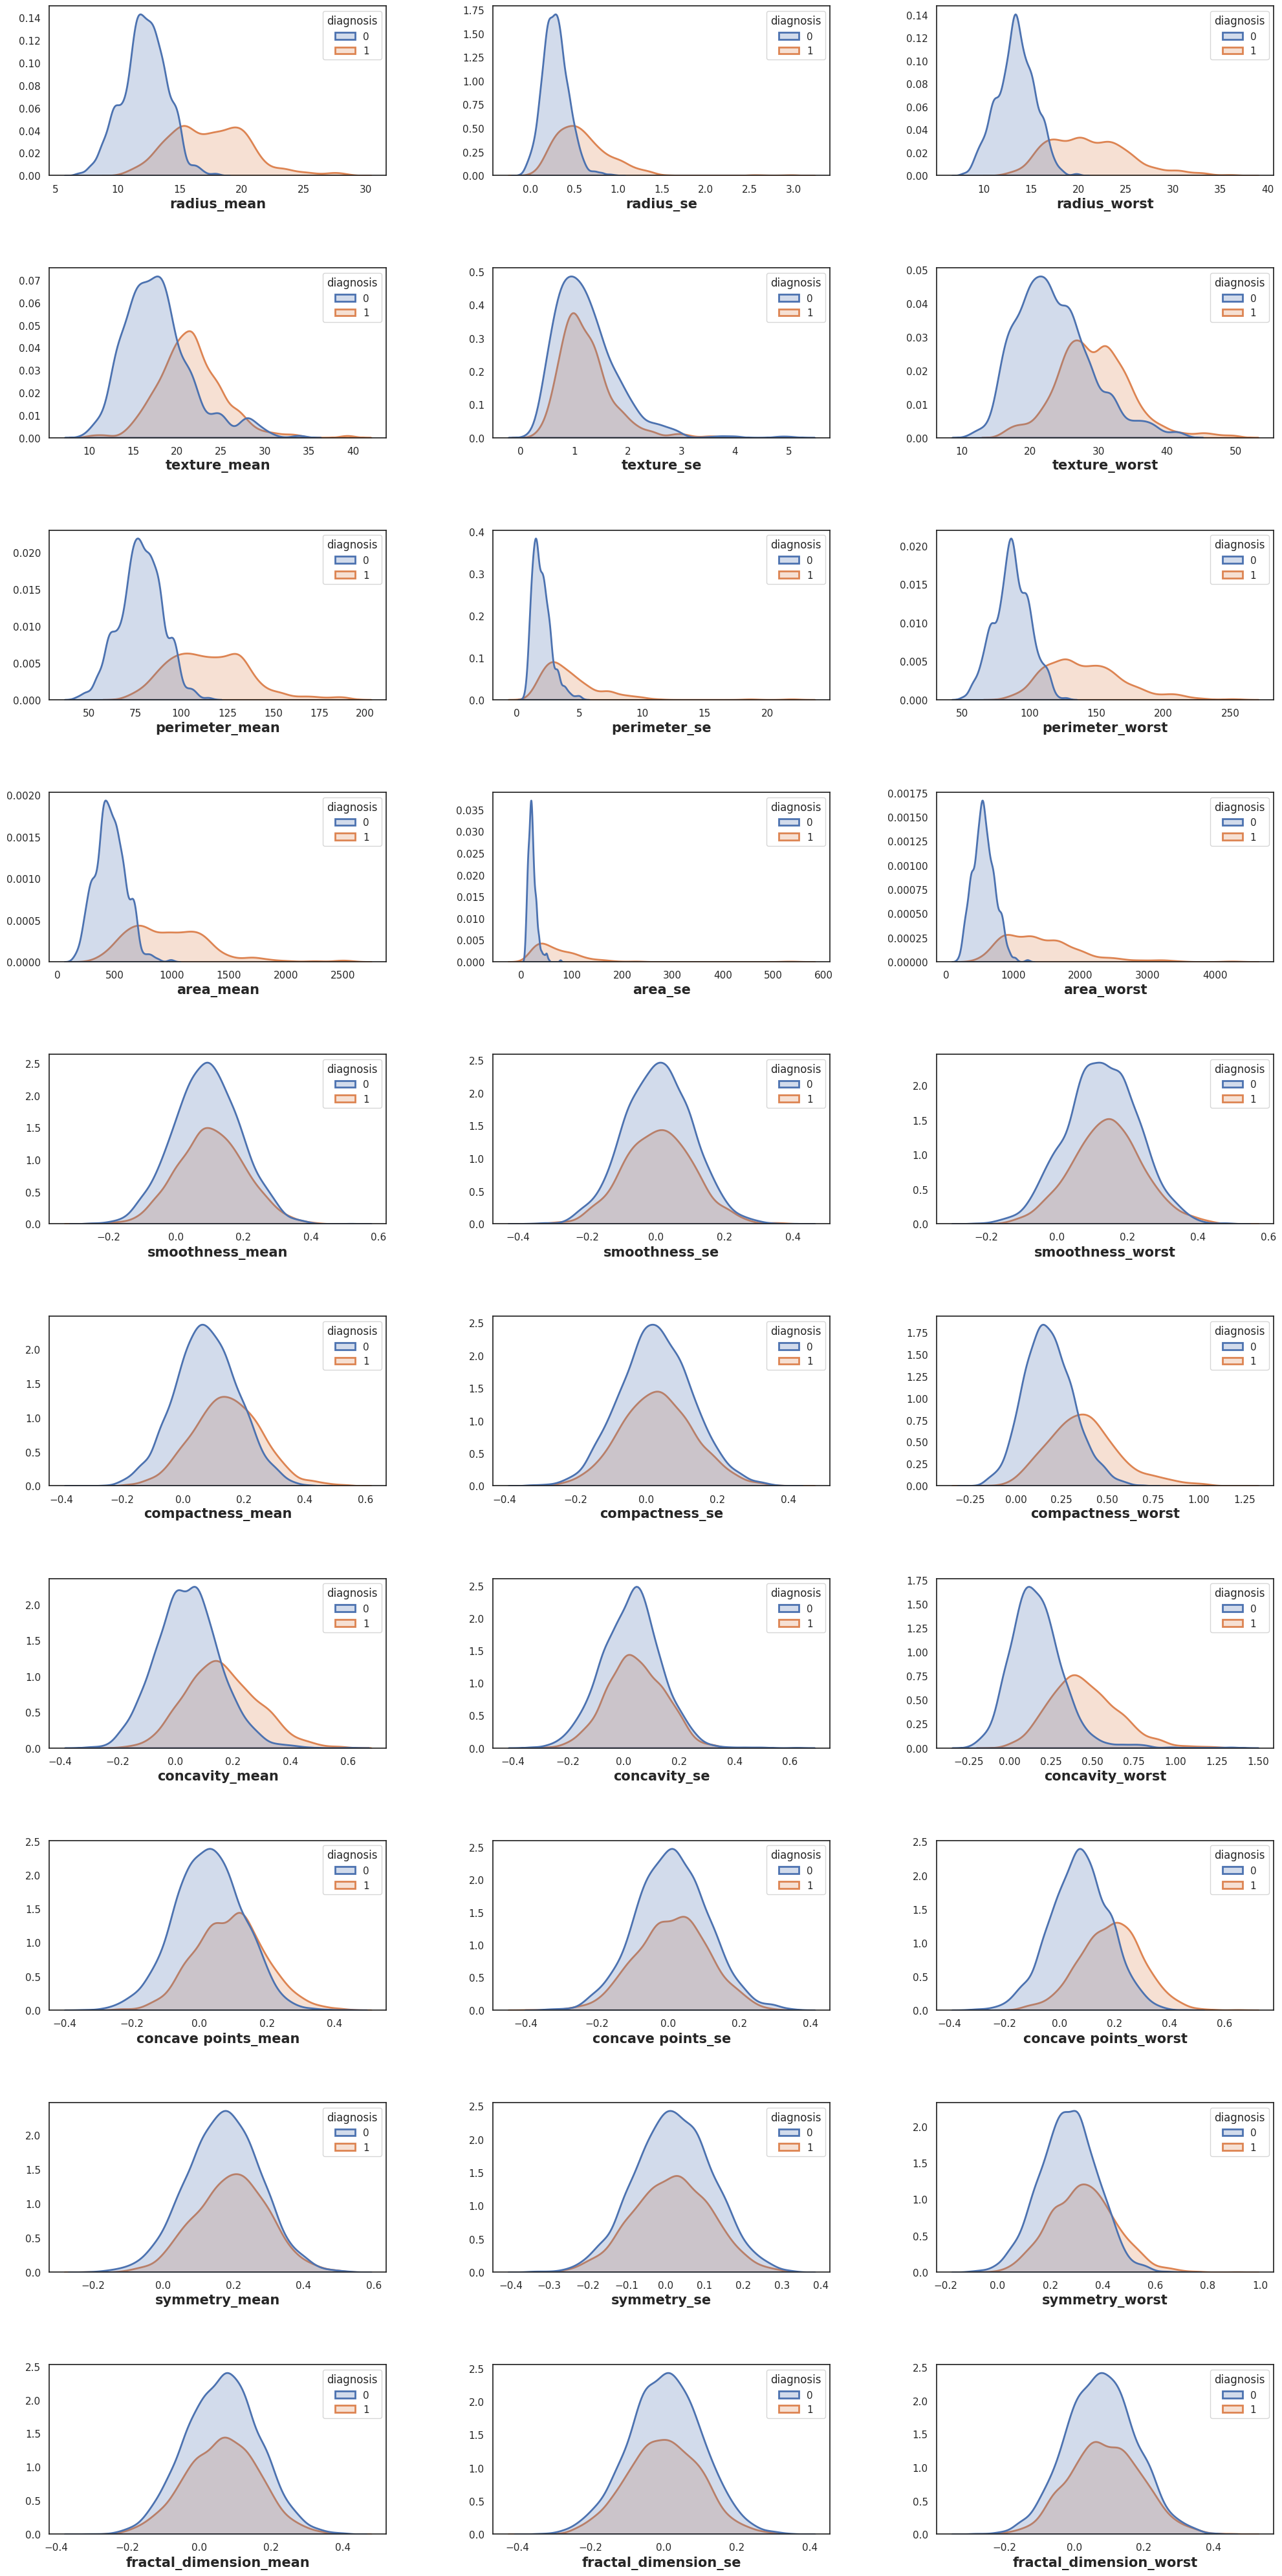

In [ ]:
fig, ax = plt.subplots(10, 3, figsize=(20, 40))
ax = ax.flatten()

for i, col in enumerate(df_ordered.columns[1:]):
    sns.kdeplot(x=col, data=df_ordered, ax=ax[i], fill=True, lw=2, hue = 'diagnosis')
    ax[i].set_xlabel(col, fontsize = 15, fontweight = 'bold')
    ax[i].set_ylabel('')

plt.tight_layout(w_pad=5, h_pad=5)
plt.show()

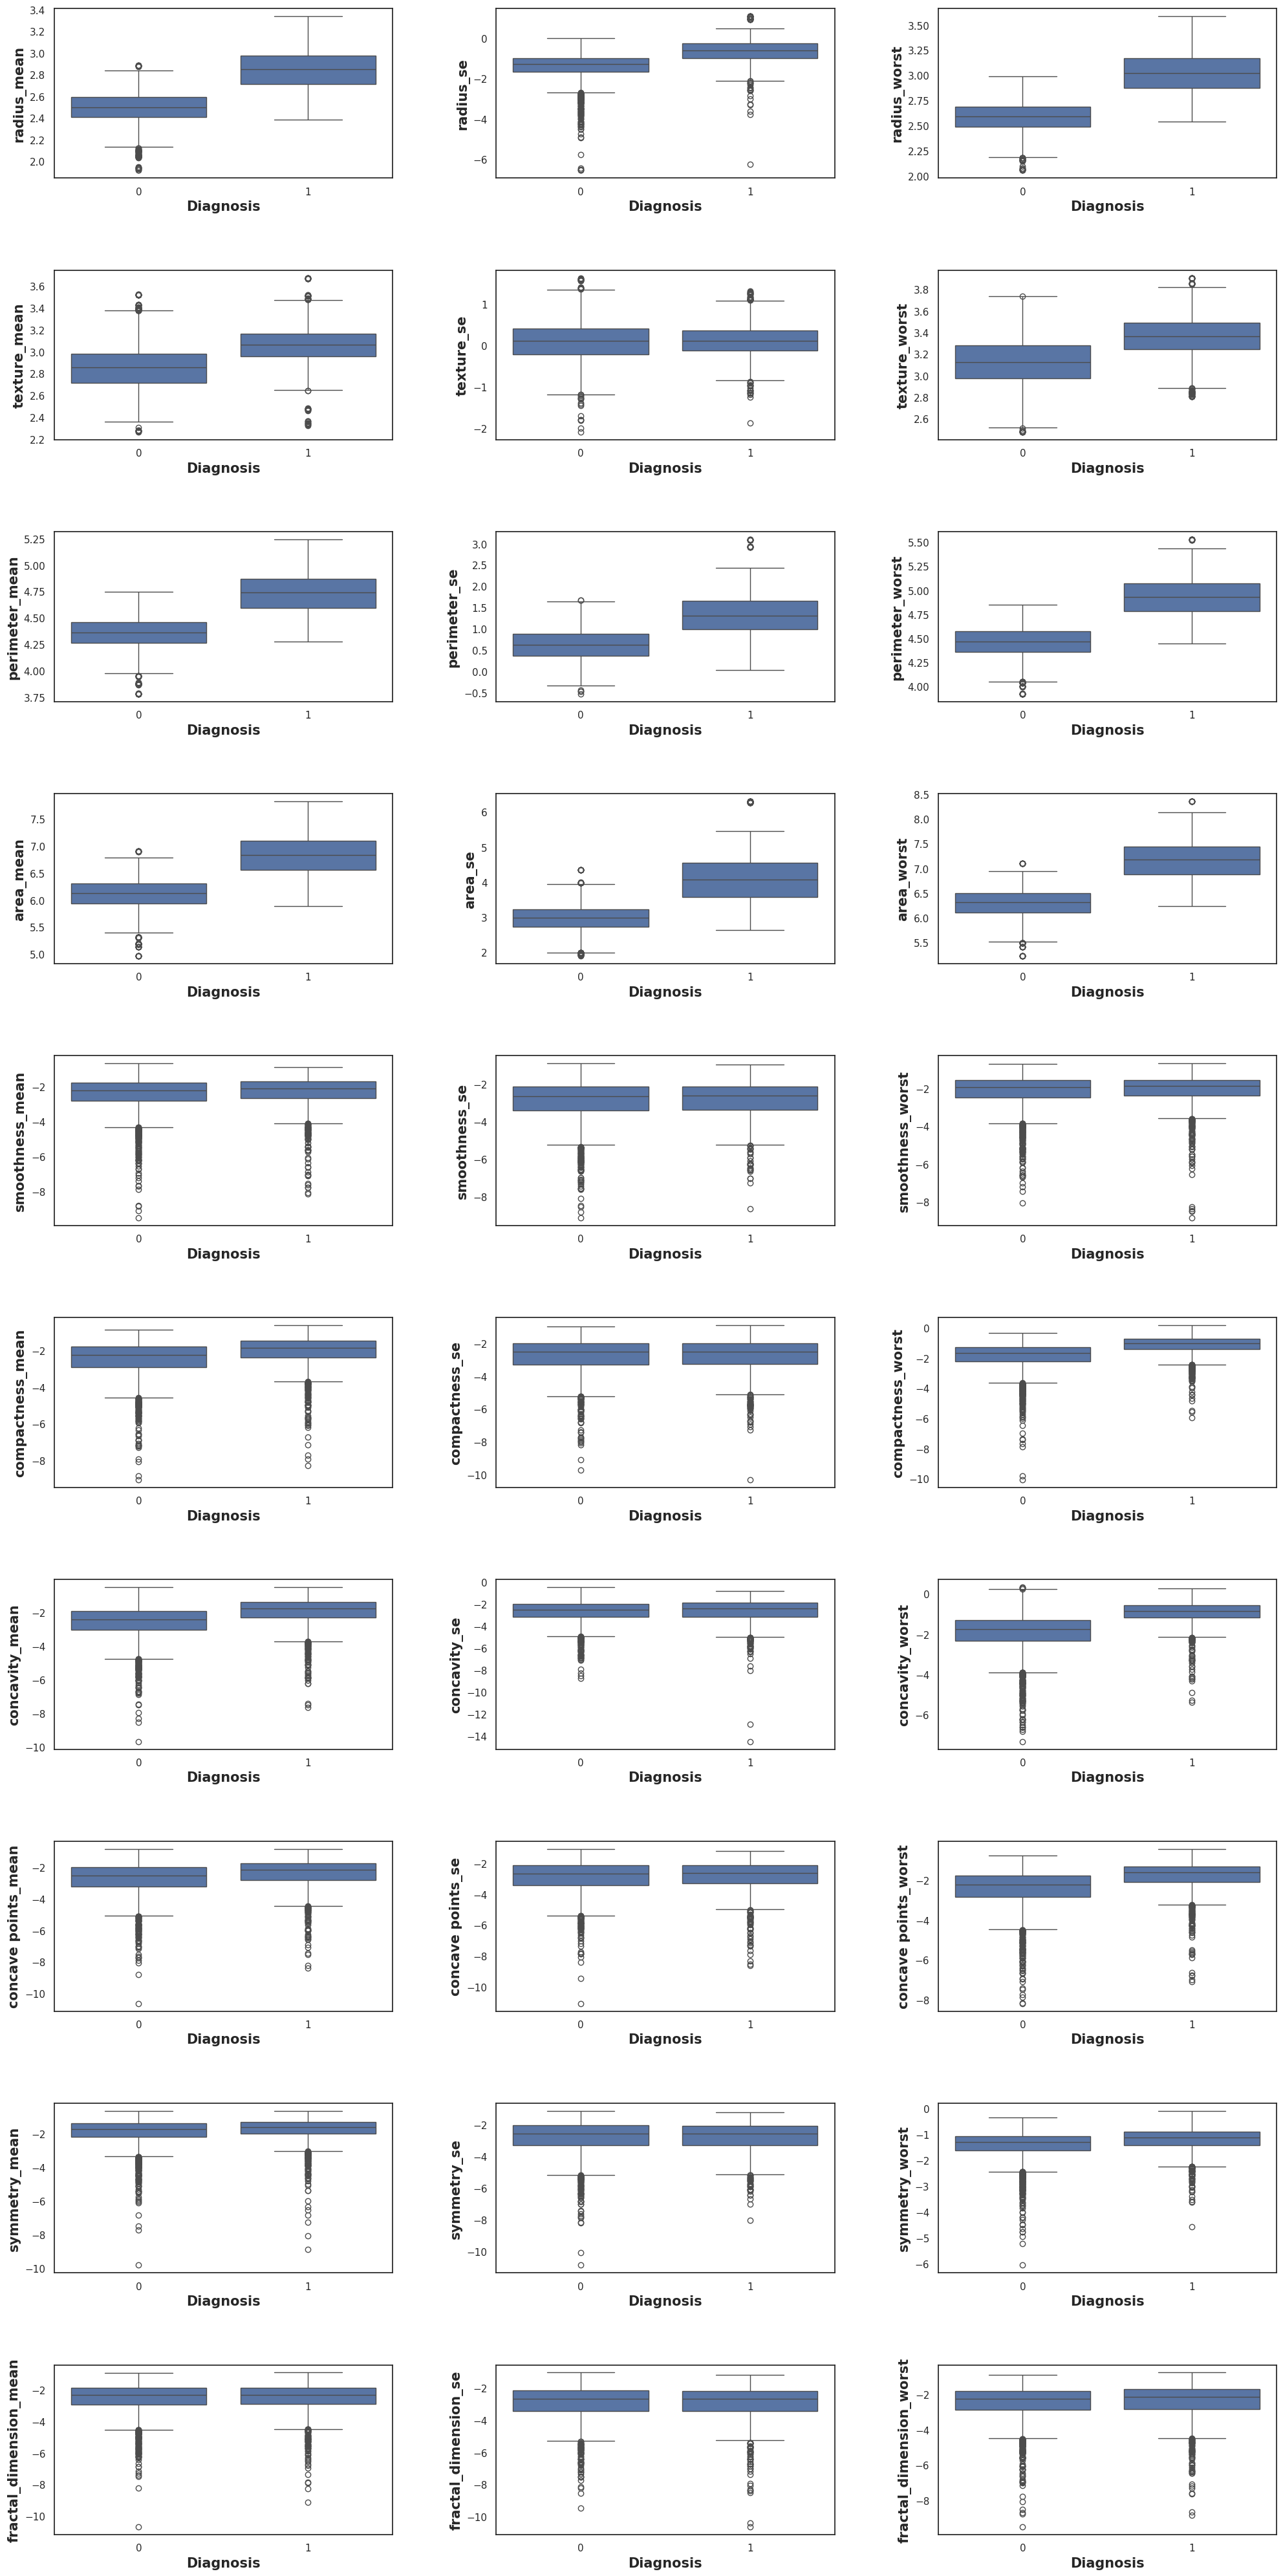

In [ ]:
fig, ax = plt.subplots(10, 3, figsize=(20, 40))
ax = ax.flatten()

for i, col in enumerate(df_ordered.columns[1:]):
    df_ordered[col] = np.log(df_ordered[col])
    sns.boxplot(x='diagnosis', y=col, data=df_ordered, ax=ax[i])
    ax[i].set_xlabel('Diagnosis', fontsize = 15, fontweight = 'bold')
    ax[i].set_ylabel(col, fontsize = 15, fontweight = 'bold')

plt.tight_layout(w_pad=5, h_pad=5)
plt.show()

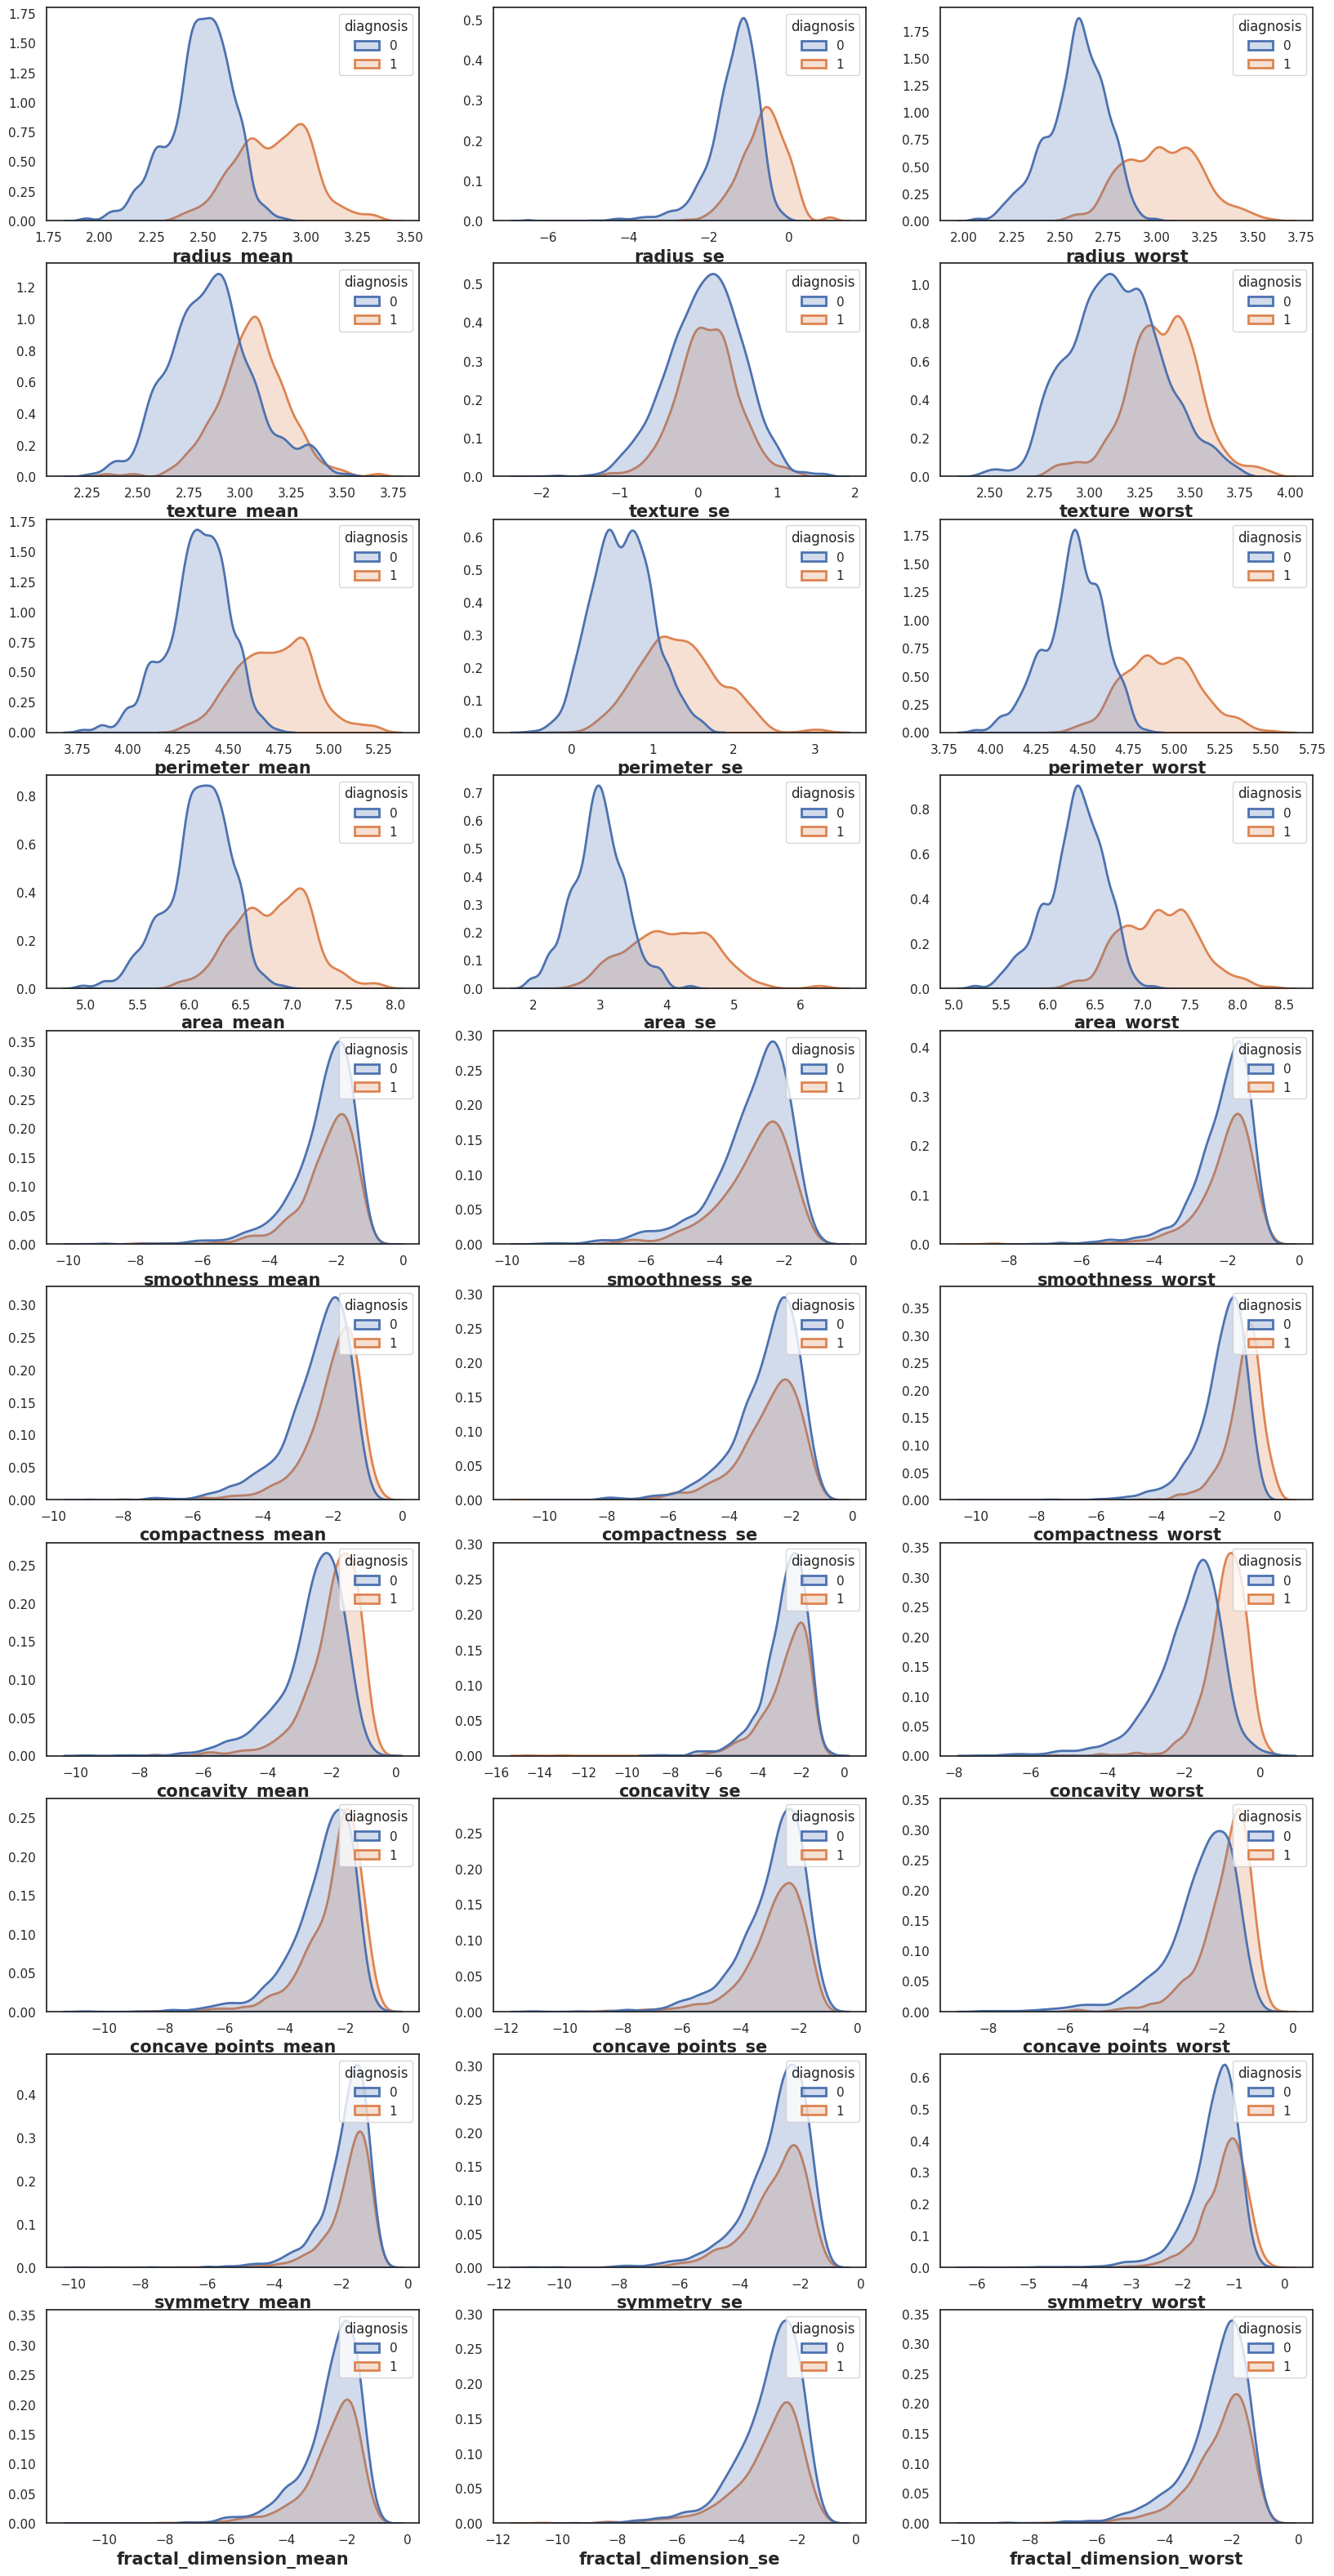

In [ ]:
fig, ax = plt.subplots(10, 3, figsize=(20, 40))
ax = ax.flatten()

for i, col in enumerate(df_ordered.columns[1:]):
    sns.kdeplot(x=col, data=df_ordered, ax=ax[i], fill=True, lw = 2, hue = 'diagnosis')
    ax[i].set_xlabel(col, fontsize = 15, fontweight = 'bold')
    ax[i].set_ylabel('')

In [ ]:
df_ordered.select_dtypes(include='number')


diagnosis  radius_mean  radius_se  radius_worst  texture_mean  \
0             1     2.890314  -0.026608      3.236339      2.357607   
1             1     3.020962  -0.505468      3.211893      2.878515   
2             1     2.983849  -0.148779      3.158433      3.050913   
3             1     2.437917  -1.504096      2.696278      3.021242   
4             1     3.013317  -0.068097      3.114099      2.653212   
...         ...          ...        ...           ...           ...   
4995          0     2.336973  -1.605289      2.410530      2.908522   
4996          1     2.885887  -1.981181      3.015113      2.819718   
4997          0     2.464994  -1.194161      2.564252      3.207820   
4998          1     2.876583  -0.988368      3.071396      3.338622   
4999          0     2.688452  -1.827891      2.795878      2.865627   

      texture_se  texture_worst  perimeter_mean  perimeter_se  \
0      -0.267812       2.846310        4.810982      2.147190   
1      -0.420356       3.157794        4.890007      1.246983   
2      -0.277857       3.245212        4.866901      1.507610   
3       0.216645       3.279326        4.348776      1.256582   
4      -0.492392       2.807418        4.906884      1.674171   
...          ...            ...             ...           ...   
4995    0.955858       3.154608        4.200155      0.164421   
4996   -0.207256       3.104008        4.764478      0.605003   
4997    0.107286       3.412582        4.352028      0.555978   
4998    0.032307       3.648895        4.763676      1.105842   
4999   -0.343232       3.119366        4.562747      0.388079   

      perimeter_worst  area_mean   area_se  area_worst  smoothness_mean  \
0            5.218525   6.908861  5.033167    7.610433        -2.501227   
1            5.067927   7.189789  4.302462    7.578601        -1.404239   
2            5.027104   7.092511  4.545154    7.443628        -1.529827   
3            4.596054   5.955814  3.299798    6.341931        -1.615112   
4            5.025219   7.167771  4.547356    7.362002        -2.161272   
...               ...        ...       ...         ...              ...   
4995         4.238383   5.831628  2.575451    5.903701        -2.242539   
4996         4.892220   6.897808  3.578558    7.163947        -2.766292   
4997         4.435519   6.089696  2.969846    6.241999              NaN   
4998         4.980144   6.889160  3.783857    7.270287        -2.969723   
4999         4.662008   6.514233  2.981625    6.720791              NaN   

      smoothness_se  smoothness_worst  compactness_mean  compactness_se  \
0               NaN         -1.400944         -1.252346       -1.527010   
1         -2.290297         -5.475855         -1.638444             NaN   
2         -1.746988         -1.591070         -1.349251       -2.171412   
3               NaN         -1.650009         -1.543654       -1.397171   
4               NaN         -1.891532         -2.124455       -1.923178   
...             ...               ...               ...             ...   
4995            NaN               NaN         -4.812323             NaN   
4996      -3.529992         -1.834475               NaN             NaN   
4997      -6.594054         -1.906031         -1.474178       -1.292761   
4998            NaN         -1.977432         -3.128496       -2.179500   
4999            NaN         -1.160273         -2.413339       -2.357536   

      compactness_worst  concavity_mean  concavity_se  concavity_worst  \
0             -0.358619       -0.920939     -1.831280        -0.302926   
1             -1.944600       -1.980060     -1.944324        -2.093606   
2             -1.146233       -2.028488           NaN        -0.727738   
3             -0.212942       -2.435678           NaN        -0.404226   
4             -1.690124       -3.591867     -1.490129        -1.225443   
...                 ...             ...           ...              ...   
4995          -3.151854             NaN     -3.28172

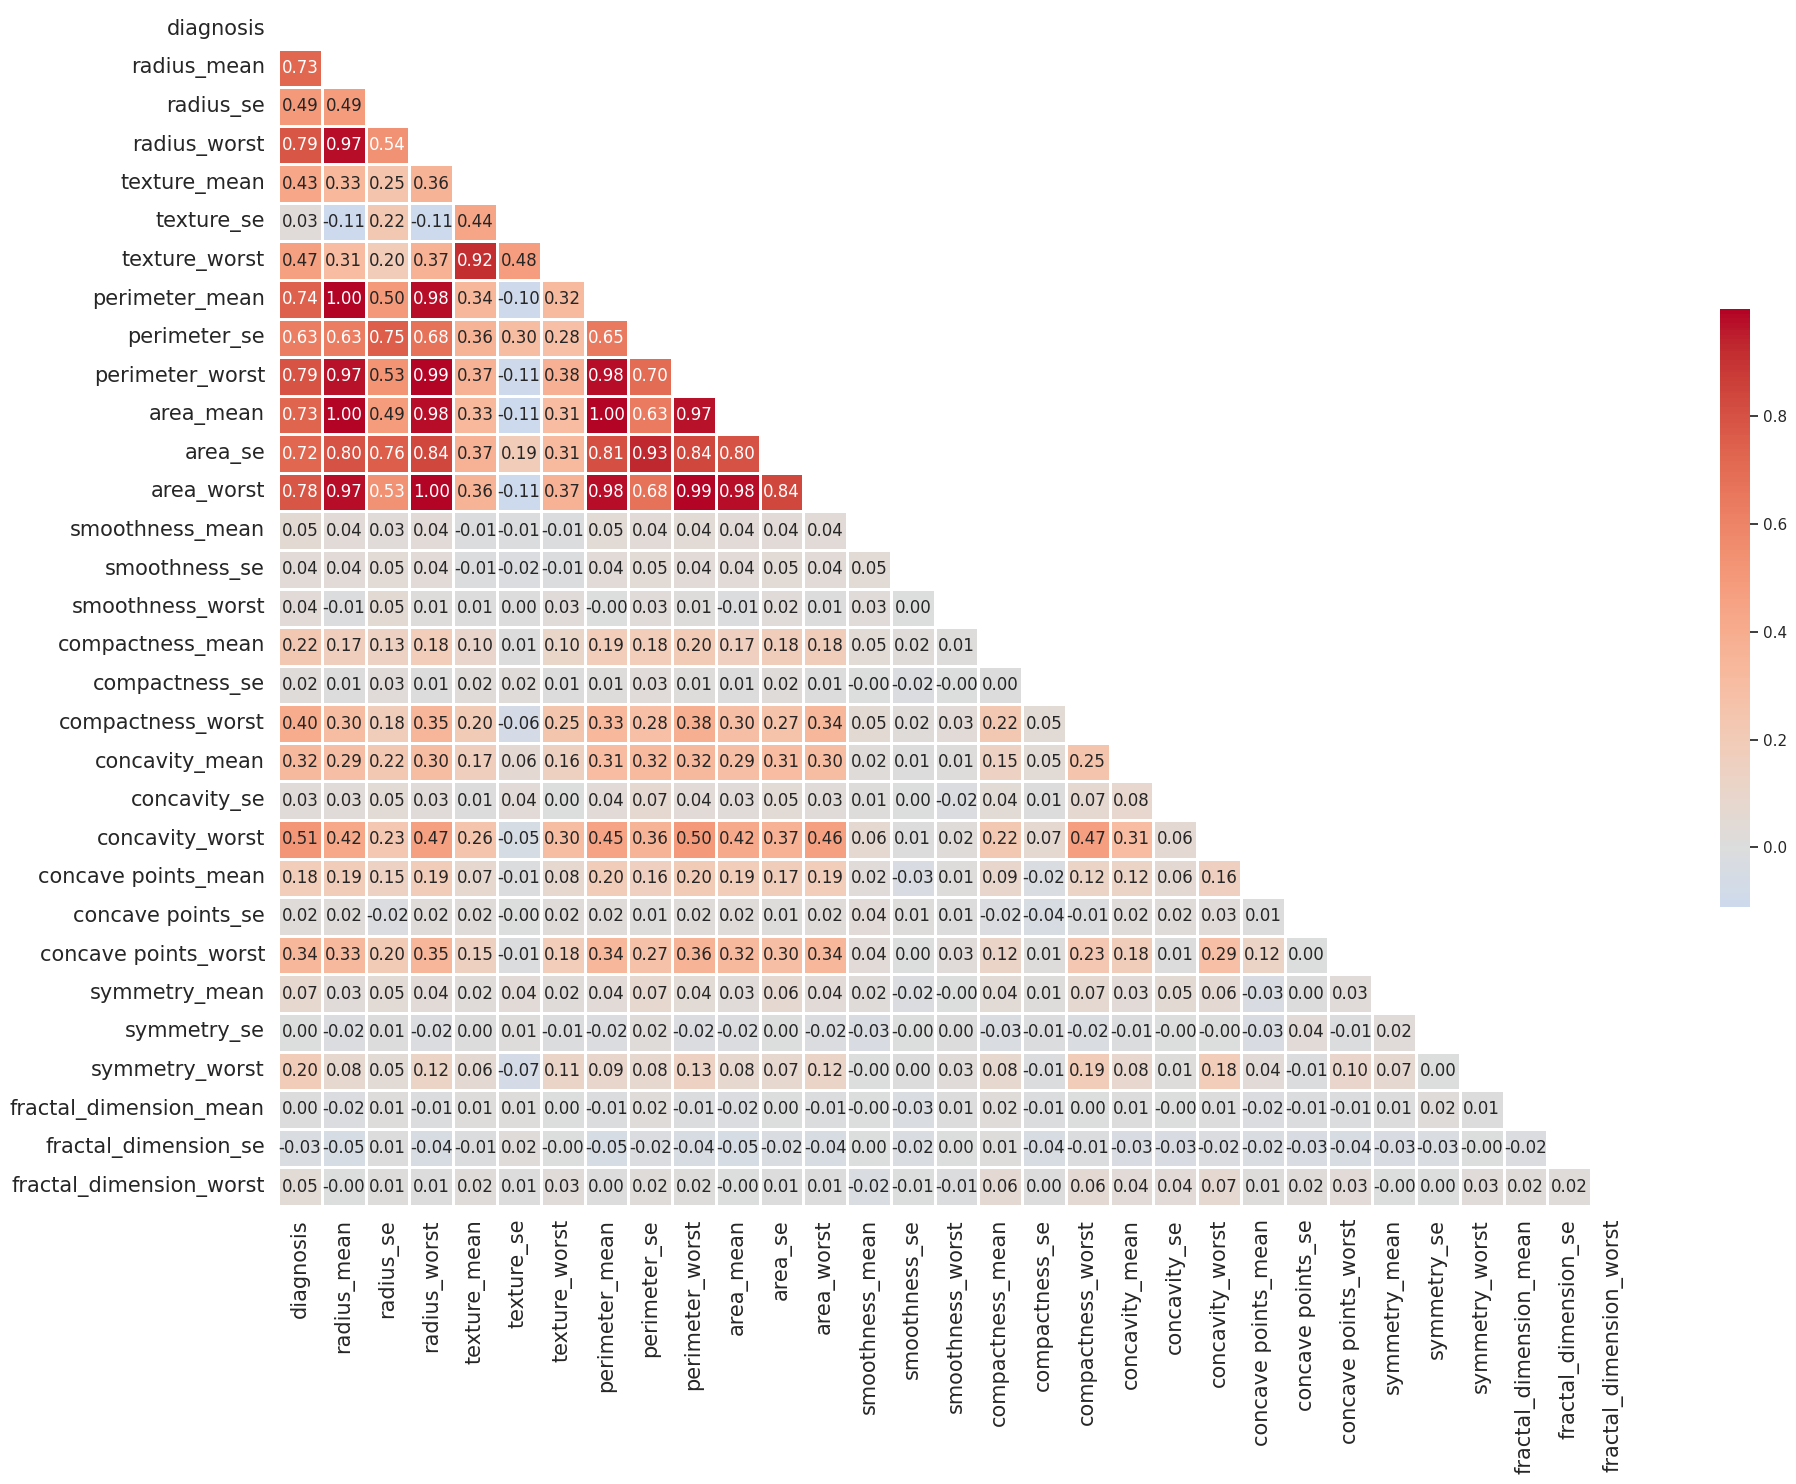

In [ ]:
sns.set_theme(style="white")

plt.figure(figsize=(20, 15))
mask = np.triu(np.ones_like(df_ordered.select_dtypes(include="number").corr(), dtype=bool))
ax = sns.heatmap(df_ordered.select_dtypes(include="number").corr(), annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=1, linecolor='white', mask=mask, center=0, cbar_kws={"shrink": .5})

for label in ax.get_yticklabels():
    label.set_size(15)

for label in ax.get_xticklabels():
    label.set_size(15)

plt.tight_layout()
plt.show()

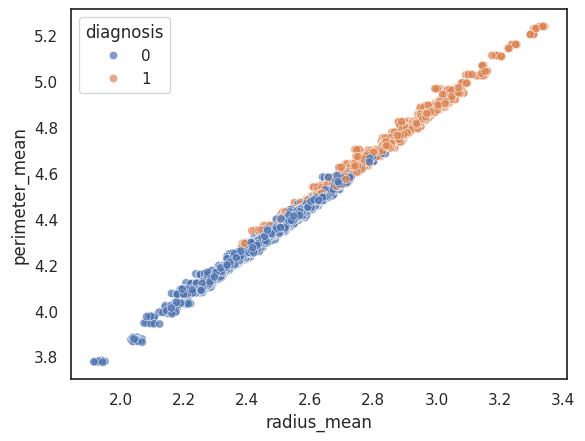

In [ ]:
sns.scatterplot(x='radius_mean', y='perimeter_mean', data=df_ordered, hue='diagnosis', alpha=0.7);

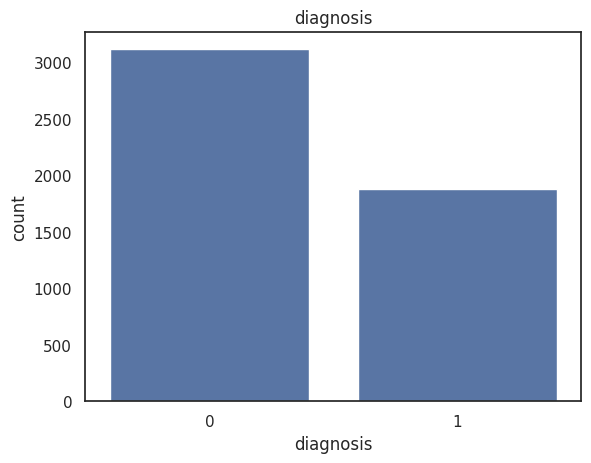

In [ ]:
sns.countplot(x=df['diagnosis'])
plt.title('diagnosis');

## Logistic Regression

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df2 = df.copy()


In [ ]:
X2=df2.drop(columns='diagnosis')
y2=df2['diagnosis']
y2

0       1
1       1
2       1
3       1
4       1
       ..
4995    0
4996    1
4997    0
4998    1
4999    0
Name: diagnosis, Length: 5000, dtype: int64

In [ ]:
X2=pd.get_dummies(X2,dtype=float,drop_first=True)
X2

radius_mean  texture_mean  perimeter_mean    area_mean  smoothness_mean  \
0       17.998968     10.565640      122.852200  1001.106710         0.081984   
1       20.511013     17.787839      132.954490  1325.823346         0.245554   
2       19.763749     21.134635      129.917650  1202.924928         0.216573   
3       11.449166     20.516768       77.383695   385.991075         0.198868   
4       20.354812     14.199572      135.217358  1296.950523         0.115178   
...           ...           ...             ...          ...              ...   
4995    10.349859     18.329683       66.696672   340.913089         0.106189   
4996    17.919459     16.772118      117.269841   990.102325         0.062895   
4997    11.763408     24.725117       77.635732   441.287241        -0.077594   
4998    17.753508     28.180264      117.175889   981.576127         0.051318   
4999    14.708886     17.560058       95.846387   674.676573        -0.149281   

      compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.285834        0.398145             0.148971       0.353091   
1             0.194282        0.138061             0.181164       0.263240   
2             0.259434        0.131534             0.167189       0.242958   
3             0.213599        0.087538             0.080289       0.334566   
4             0.119498        0.027547             0.023348       0.229555   
...                ...             ...                  ...            ...   
4995          0.008129       -0.050550            -0.013094       0.141998   
4996         -0.030011        0.217073             0.023926       0.102955   
4997          0.228967        0.097245             0.021119       0.217262   
4998          0.043784        0.033400             0.017686       0.175122   
4999          0.089516        0.054417             0.040425       0.137960   

      fractal_dimension_mean  radius_se  texture_se  perimeter_se     area_se  \
0                   0.017206   0.973743    0.765052      8.560768  153.418144   
1                  -0.077472   0.603223    0.656813      3.479828   73.881462   
2                   0.173663   0.861760    0.757405      4.515927   94.174936   
3                   0.157591   0.222218    1.241904      3.513392   27.107167   
4                   0.070076   0.934170    0.611162      5.334372   94.382490   
...                      ...        ...         ...           ...         ...   
4995                0.118298   0.200832    2.600902      1.178711   13.137245   
4996                0.088434   0.137906    0.812812      1.831258   35.821865   
4997                0.173088   0.302958    1.113252      1.743645   19.488911   
4998                0.088245   0.372184    1.032835      3.021769   43.985368   
4999                0.100303   0.160752    0.709474      1.474146   19.719829   

      smoothness_se  compactness_se  concavity_se  concave points_se  \
0         -0.186312        0.217184      0.160208          -0.079299   
1          0.101236       -0.095907      0.143084           0.153995   
2          0.174298        0.114017     -0.002335          -0.112769   
3         -0.114500        0.247295     -0.047021           0.145091   
4         -0.116488        0.146142      0.225344           0.024724   
...             ...             ...           ...                ...   
4995      -0.090648       -0.024097      0.037563           0.085840   
4996       0.029305       -0.112669      0.220136          -0.111599   
4997       0.001368        0.274512      0.057994          -0.066346   
4998      -0.156189        0.113098      0.027275           0.093277   
4999      -0.032095        0.094653     -0.056272          -0.037896   

      symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0       -0.023415              0.005301     25.440416      17.224112   
1        0.024608              0.000619     24.826036      23.518646   
2       -0.119702              0.113259   

In [ ]:
df2['diagnosis'].value_counts()

0    3120
1    1880
Name: diagnosis, dtype: int64

In [ ]:
X2_train , X2_test , y2_train , y2_test = train_test_split(X2 , y2 , test_size=0.2 , random_state=42)

In [ ]:
DT_model = DecisionTreeClassifier(random_state=42)
DT_model.fit(X2_train , y2_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
DT_model.score(X2_test , y2_test)

0.994

In [ ]:
DT_pred=DT_model.predict(X2_test)

In [ ]:
DT2_acc = accuracy_score(y2_test ,DT_pred )
DT2_acc

0.994

In [ ]:
print(classification_report(y2_test , DT_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       629
           1       0.99      0.99      0.99       371

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



Text(91.25, 0.5, 'True Value')

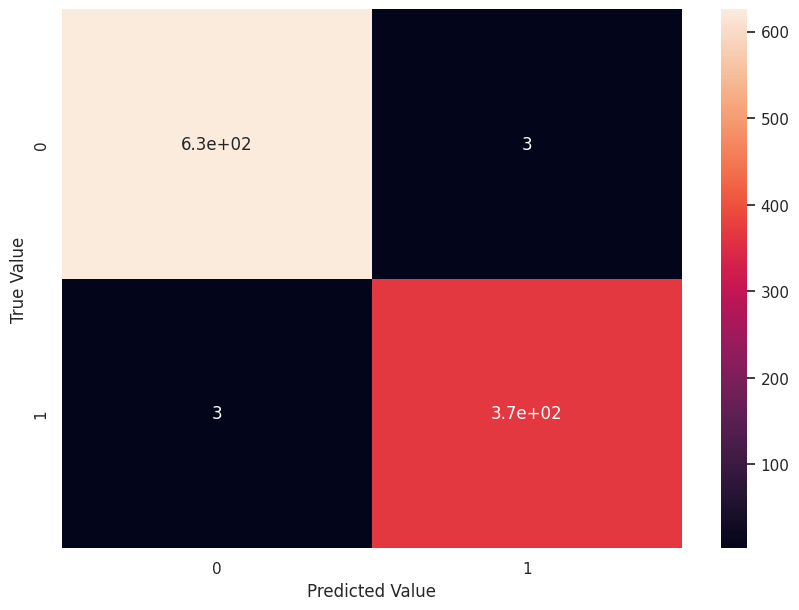

In [ ]:
cm2 = confusion_matrix(y2_test,DT_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm2,annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

As the model was overfitted, we made some purning changes in the parameters, that reduced the accuracy

In [ ]:
# Initialize the Decision Tree Classifier with pruning parameters
DT_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)

In [ ]:
DT_model.fit(X2_train, y2_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [ ]:
DT_pred = DT_model.predict(X2_test)
DT2_acc = accuracy_score(y2_test, DT_pred)
print("Accuracy:", DT2_acc)

Accuracy: 0.978


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       629
           1       0.99      0.95      0.97       371

    accuracy                           0.98      1000
   macro avg       0.98      0.97      0.98      1000
weighted avg       0.98      0.98      0.98      1000



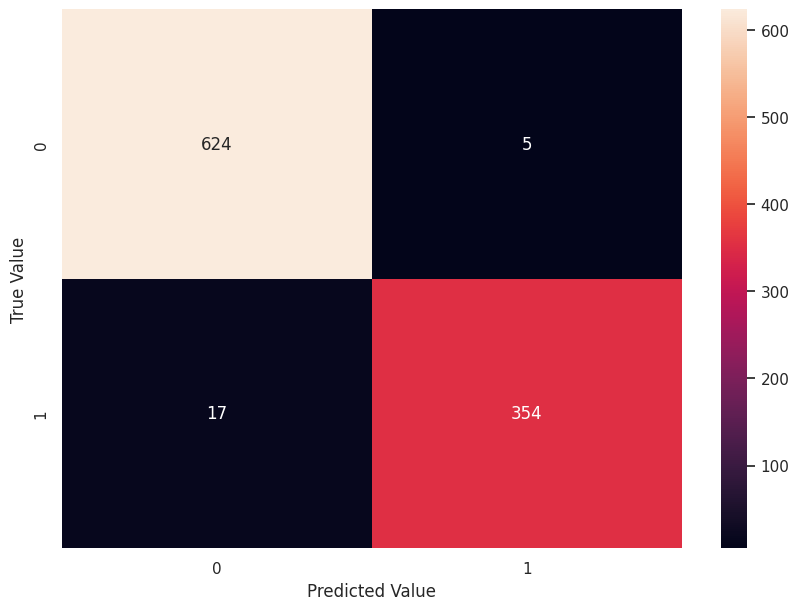

In [ ]:
# Print classification report
print(classification_report(y2_test, DT_pred))

# Plot confusion matrix
cm2 = confusion_matrix(y2_test, DT_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm2, annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

##Random Forest

In [ ]:
 X= df.drop("diagnosis", axis=1)
y = df["diagnosis"]
y.tail()

4995    0
4996    1
4997    0
4998    1
4999    0
Name: diagnosis, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

param_grid = {
    "n_estimators": [50, 100, 150, 200,250, 300],
}

gscv = GridSearchCV(rf, param_grid, cv = 5, scoring="accuracy")
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 150, 200, 250, 300]},
             scoring='accuracy')

In [ ]:
print("Best Params: ", gscv.best_params_)
print("Best Score: ", gscv.best_score_)

Best Params:  {'n_estimators': 50}
Best Score:  0.99175


In [ ]:
y_pred = gscv.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,

Score: 0.987
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       629
           1       0.98      0.98      0.98       371

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



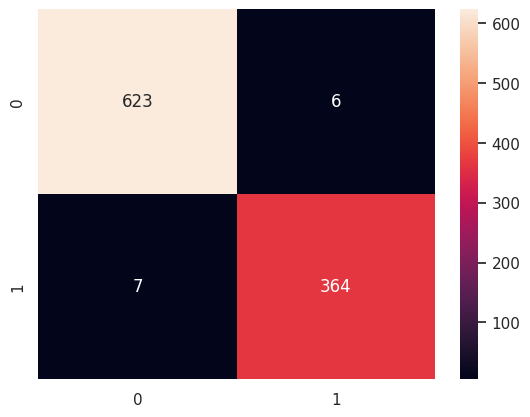

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Calculate accuracy score
score = accuracy_score(y_test, y_pred)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt="d")

# Print accuracy score
print("Score:", score)

# Print classification report
print(classification_report(y_test, y_pred))



##SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import *

In [ ]:
df4 = df.copy()

In [ ]:
X4=df4.drop(columns='diagnosis')
y4=df4['diagnosis']
y4

0       1
1       1
2       1
3       1
4       1
       ..
4995    0
4996    1
4997    0
4998    1
4999    0
Name: diagnosis, Length: 5000, dtype: int64

In [ ]:
X4_train , X4_test , y4_train , y4_test = train_test_split(X4 , y4 , test_size=0.2 , random_state=42)

In [ ]:
svc=SVC(kernel='linear')
svc.fit(X4_train,y4_train)
y4_train_pred=svc.predict(X4_train)
y4_test_pred=svc.predict(X4_test)

print(accuracy_score(y4_train,y4_train_pred))
print(accuracy_score(y4_test,y4_test_pred))

0.96975
0.958


In [ ]:
svc.score(X4_test , y4_test)

0.958

In [ ]:
svc_pred=svc.predict(X4_test)

In [ ]:
svc_acc = accuracy_score(y4_test ,svc_pred )
svc_acc

0.958

In [ ]:
print(classification_report(y4_test , svc_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       629
           1       0.94      0.95      0.94       371

    accuracy                           0.96      1000
   macro avg       0.95      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



Text(91.25, 0.5, 'True Value')

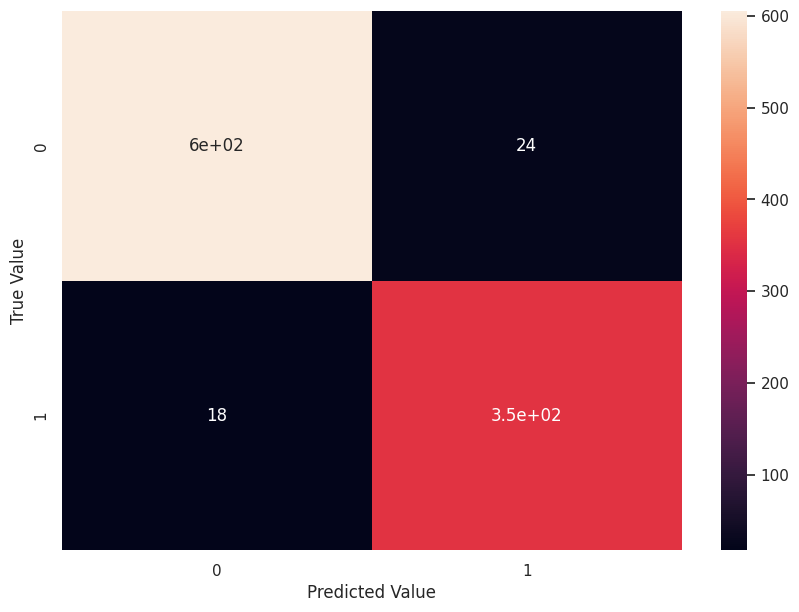

In [ ]:
cm4 = confusion_matrix(y4_test,svc_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm4,annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

In [ ]:
print("For training dataset:")
print(confusion_matrix(y4_train,y4_train_pred))
print("For testing dataset: ")
print(confusion_matrix(y4_test,y4_test_pred))

For training dataset:
[[2436   55]
 [  66 1443]]
For testing dataset: 
[[605  24]
 [ 18 353]]


In [ ]:
print("For training dataset:")
print(classification_report(y4_train,y4_train_pred))
print("For testing dataset: ")
print(classification_report(y4_test,y4_test_pred))

For training dataset:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2491
           1       0.96      0.96      0.96      1509

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000

For testing dataset: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       629
           1       0.94      0.95      0.94       371

    accuracy                           0.96      1000
   macro avg       0.95      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



##Gradient Boosting


## XGB

## Light GBM

In [ ]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Initialize LightGBM classifier
lgbm = LGBMClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'num_leaves': [20, 30, 40],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 150]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Predict labels for the test data using the best estimator
y_pred = best_estimator.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)
print("Best Parameters:", best_params)



Streaming output truncated to the last 5000 lines.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 3200, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377188 -> initscore=-0.501503
[LightGBM] [Info] Start training from score -0.501503
[LightGBM] [Info] Number of positive: 1207, number of negative: 1993
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 3200, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377188 -> initscore=-0.501503
[LightGBM] [Info] Start training from score -0.501503
[LightGBM] [Info] Number of positive: 1207, number of negative: 1993
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001366 seconds.
You can set `force_col_wi

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Evaluate the model's accuracy
test_accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

## RNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout

In [ ]:
df8 = df.copy()

In [ ]:
X8=df8.drop(columns='diagnosis')
y8=df8['diagnosis']


In [ ]:
X8_train , X8_test , y8_train , y8_test = train_test_split(X8 , y8 , test_size=0.2 , random_state=42)

In [ ]:
#standardizig the featuring
scaler = StandardScaler()
X8_train_scaled = scaler.fit_transform(X8_train)
X8_test_scaled = scaler.transform(X8_test)

In [ ]:
# Reshape the data for RNN input (3D tensor expected)
X8_train_reshaped = X8_train_scaled.reshape((X8_train_scaled.shape[0], 1, X8_train_scaled.shape[1]))
X8_test_reshaped = X8_test_scaled.reshape((X8_test_scaled.shape[0], 1, X8_test_scaled.shape[1]))


In [ ]:
# Build the RNN model
model8 = Sequential([
    SimpleRNN(64, input_shape=(X8_train_reshaped.shape[1], X8_train_reshaped.shape[2]), activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model8.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model8.fit(X8_train_reshaped, y8_train, epochs=10, batch_size=32, validation_data=(X8_test_reshaped, y8_test))

Epoch 1/10
125/125 [==============================] - 3s 10ms/step - loss: 0.3484 - accuracy: 0.8460 - val_loss: 0.1616 - val_accuracy: 0.9450
Epoch 2/10
125/125 [==============================] - 1s 6ms/step - loss: 0.1552 - accuracy: 0.9408 - val_loss: 0.1341 - val_accuracy: 0.9500
Epoch 3/10
125/125 [==============================] - 1s 5ms/step - loss: 0.1254 - accuracy: 0.9538 - val_loss: 0.1286 - val_accuracy: 0.9530
Epoch 4/10
125/125 [==============================] - 1s 6ms/step - loss: 0.1150 - accuracy: 0.9532 - val_loss: 0.1260 - val_accuracy: 0.9530
Epoch 5/10
125/125 [==============================] - 1s 4ms/step - loss: 0.1131 - accuracy: 0.9553 - val_loss: 0.1228 - val_accuracy: 0.9540
Epoch 6/10
125/125 [==============================] - 0s 3ms/step - loss: 0.1048 - accuracy: 0.9590 - val_loss: 0.1232 - val_accuracy: 0.9530
Epoch 7/10
125/125 [==============================] - 0s 3ms/step - loss: 0.1006 - accuracy: 0.9622 - val_loss: 0.1199 - val_accuracy: 0.9560
Epoch

In [ ]:
# Evaluate the model
loss8, accuracy8 = model8.evaluate(X8_test_reshaped, y8_test)
print(f'Test Accuracy: {accuracy8}')

32/32 [==============================] - 0s 2ms/step - loss: 0.1167 - accuracy: 0.9570
Test Accuracy: 0.9570000171661377


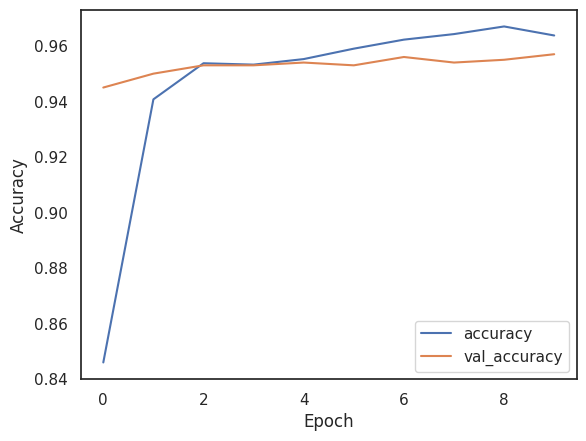

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
